In [1]:
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Tabular Data Preprocessing
data_path = 'data/train.csv'

# Load tabular data into a DataFrame
df = pd.read_csv(data_path,low_memory=False)

In [2]:
df.shape

(2989, 365)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2989 entries, 0 to 2988
Columns: 365 entries, Patient_ID to Type_of_Venom_Allergy_IGE_Venom
dtypes: float64(322), int64(32), object(11)
memory usage: 8.3+ MB


In [4]:
print(df.dtypes)

Patient_ID                           object
Chip_Code                            object
Chip_Type                            object
Chip_Image_Name                      object
Age                                 float64
                                     ...   
Type_of_Food_Allergy_Shellfish        int64
Type_of_Food_Allergy_TPO              int64
Type_of_Food_Allergy_Tree_Nuts        int64
Type_of_Venom_Allergy_ATCD_Venom      int64
Type_of_Venom_Allergy_IGE_Venom       int64
Length: 365, dtype: object


In [5]:
df.isnull().sum()

Patient_ID                             0
Chip_Code                              0
Chip_Type                              0
Chip_Image_Name                     2095
Age                                   39
                                    ... 
Type_of_Food_Allergy_Shellfish         0
Type_of_Food_Allergy_TPO               0
Type_of_Food_Allergy_Tree_Nuts         0
Type_of_Venom_Allergy_ATCD_Venom       0
Type_of_Venom_Allergy_IGE_Venom        0
Length: 365, dtype: int64

In [6]:
df.describe()

,Age,Gender,Blood_Month_sample,Rural_or_urban_area,Sensitization,Treatment_of_rhinitis,Skin_Symptoms,Act_d_1,Act_d_2,Act_d_5,...,Type_of_Food_Allergy_Fruits_and_Vegetables,Type_of_Food_Allergy_Mammalian_Milk,Type_of_Food_Allergy_Oral_Syndrom,Type_of_Food_Allergy_Other_Legumes,Type_of_Food_Allergy_Peanut,Type_of_Food_Allergy_Shellfish,Type_of_Food_Allergy_TPO,Type_of_Food_Allergy_Tree_Nuts,Type_of_Venom_Allergy_ATCD_Venom,Type_of_Venom_Allergy_IGE_Venom
count,2950.000000,2950.000000,2902.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,...,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.000000,2989.00000
mean,23.302712,0.504068,6.432805,6.565072,0.838407,6.497658,5.407829,0.479361,0.395764,0.005698,...,4.193710,4.169622,4.197390,4.177986,4.197390,4.174640,4.177986,4.209435,0.007026,0.00736
std,18.691683,0.500068,3.397000,3.771440,0.368138,3.859990,4.154958,2.843571,2.978397,0.075067,...,4.461303,4.481145,4.458253,4.474280,4.458253,4.477029,4.474280,4.448233,0.083539,0.08549
min,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,9.000000,0.000000,3.000000,1.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,16.000000,1.000000,7.000000,9.000000,1.000000,9.000000,9.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000
75%,35.000000,1.000000,9.000000,9.000000,1.000000,9.000000,9.000000,0.000000,0.000000,0.000000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,0.000000,0.00000
max,87.000000,1.000000,12.000000,9.000000,1.000000,9.000000,9.000000,50.020000,91.640000,2.170000,...,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,9.000000,1.000000,1.00000


In [7]:
for column in df.columns:
    if df[column].nunique() <= 10:
        print(df[column].value_counts())


ISAC_V1    1639
ALEX        803
ISAC_V2     547
Name: Chip_Type, dtype: int64
1.0    1487
0.0    1463
Name: Gender, dtype: int64
9    2107
1     660
0     222
Name: Rural_or_urban_area, dtype: int64
1    2506
0     483
Name: Sensitization, dtype: int64
Mammalian Milk    1
Egg               1
Name: Food_Type_0, dtype: int64
9.0    2090
0.0     603
2.0     152
3.0      70
1.0      62
4.0       7
1.3       4
2.3       1
Name: Treatment_of_rhinitis, dtype: int64
9       1809
0        435
4        214
2        177
6        101
5         96
3         90
1         66
2, 3       1
Name: Age_of_onsets, dtype: int64
9    1706
1     810
0     473
Name: Skin_Symptoms, dtype: int64
9       1879
0        895
2         88
5         65
1         40
4          9
3          8
1, 2       4
7          1
Name: Treatment_of_atopic_dematitis, dtype: int64
0.00    802
0.01      1
Name: Ovi_a_epithelia, dtype: int64
1    1368
9    1230
0     391
Name: Allergy_Present, dtype: int64
9    1319
1    1042
0     628

In [8]:
non_numeric_columns = df.select_dtypes(exclude=['float', 'int']).columns.tolist()
print(non_numeric_columns)


['Patient_ID', 'Chip_Code', 'Chip_Type', 'Chip_Image_Name', 'French_Residence_Department', 'French_Region', 'Food_Type_0', 'Treatment_of_athsma', 'Age_of_onsets', 'General_cofactors', 'Treatment_of_atopic_dematitis']


In [9]:


# Fill missing values for object columns with mode
object_columns = df.select_dtypes(include=['object']).columns
for column in object_columns:
    mode_value = df[column].mode()[0]
    df[column] = df[column].fillna(mode_value)

# Fill missing values for numeric columns with median
numeric_columns = df.select_dtypes(include=['int', 'float']).columns
for column in numeric_columns:
    median_value = df[column].median()
    df[column] = df[column].fillna(median_value)
df.dtypes

Patient_ID                           object
Chip_Code                            object
Chip_Type                            object
Chip_Image_Name                      object
Age                                 float64
                                     ...   
Type_of_Food_Allergy_Shellfish        int64
Type_of_Food_Allergy_TPO              int64
Type_of_Food_Allergy_Tree_Nuts        int64
Type_of_Venom_Allergy_ATCD_Venom      int64
Type_of_Venom_Allergy_IGE_Venom       int64
Length: 365, dtype: object

In [10]:
target_cols = ['Allergy_Present', 'Severe_Allergy', 'Respiratory_Allergy', 'Food_Allergy', 'Venom_Allergy', 'Type_of_Respiratory_Allergy_ARIA', 'Type_of_Respiratory_Allergy_CONJ', 'Type_of_Respiratory_Allergy_GINA', 'Type_of_Respiratory_Allergy_IGE_Pollen_Gram', 'Type_of_Respiratory_Allergy_IGE_Pollen_Herb', 'Type_of_Respiratory_Allergy_IGE_Pollen_Tree', 'Type_of_Respiratory_Allergy_IGE_Dander_Animals', 'Type_of_Respiratory_Allergy_IGE_Mite_Cockroach', 'Type_of_Respiratory_Allergy_IGE_Molds_Yeast', 'Type_of_Food_Allergy_Aromatics', 'Type_of_Food_Allergy_Other', 'Type_of_Food_Allergy_Cereals_&_Seeds', 'Type_of_Food_Allergy_Egg', 'Type_of_Food_Allergy_Fish', 'Type_of_Food_Allergy_Fruits_and_Vegetables', 'Type_of_Food_Allergy_Mammalian_Milk', 'Type_of_Food_Allergy_Oral_Syndrom', 'Type_of_Food_Allergy_Other_Legumes', 'Type_of_Food_Allergy_Peanut', 'Type_of_Food_Allergy_Shellfish', 'Type_of_Food_Allergy_TPO', 'Type_of_Food_Allergy_Tree_Nuts', 'Type_of_Venom_Allergy_ATCD_Venom', 'Type_of_Venom_Allergy_IGE_Venom']

In [11]:
df[target_cols] = df[target_cols].replace(9, 2)

In [12]:
# Encode categorical variables
categorical_cols = ['Patient_ID', 'Chip_Code', 'Chip_Type', 'Chip_Image_Name', 'French_Residence_Department', 'French_Region', 'Food_Type_0', 'Treatment_of_athsma', 'Age_of_onsets', 'General_cofactors', 'Treatment_of_atopic_dematitis']
for col in categorical_cols:
    print(df[col].dtype)

object
object
object
object
object
object
object
object
object
object
object


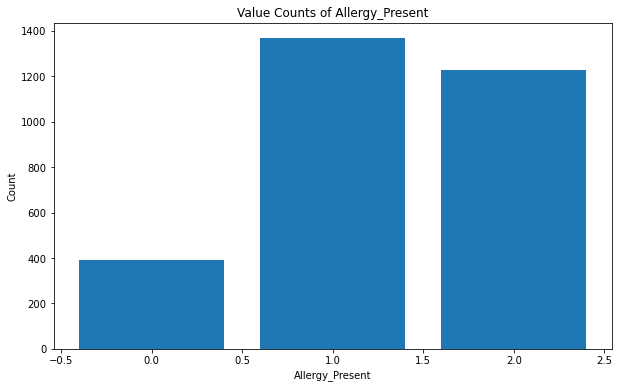

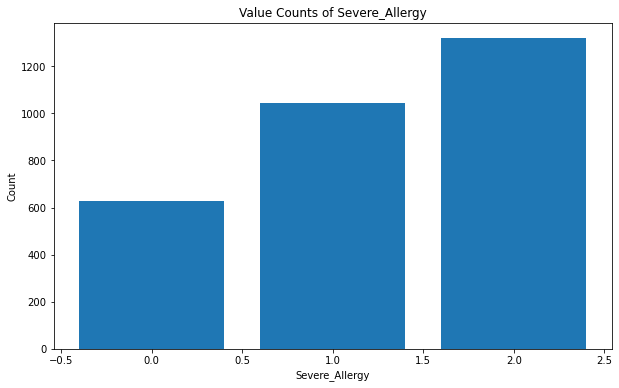

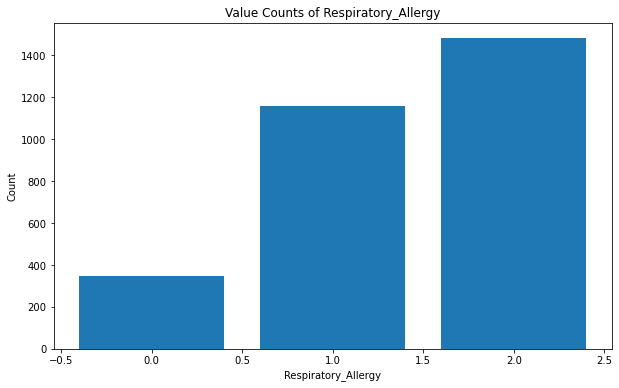

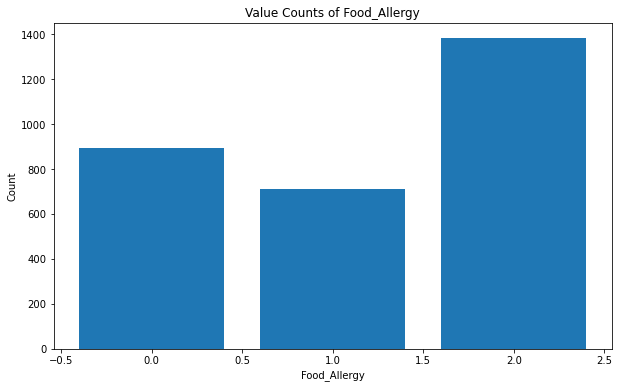

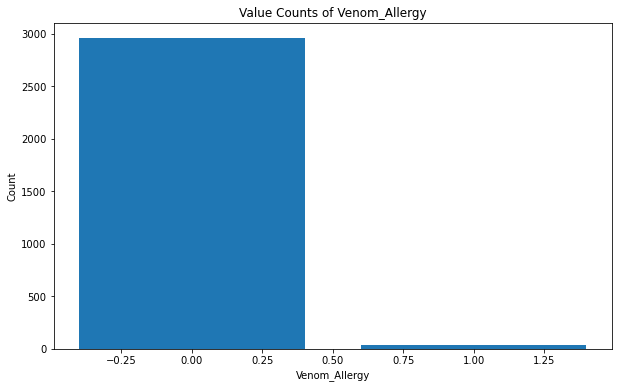

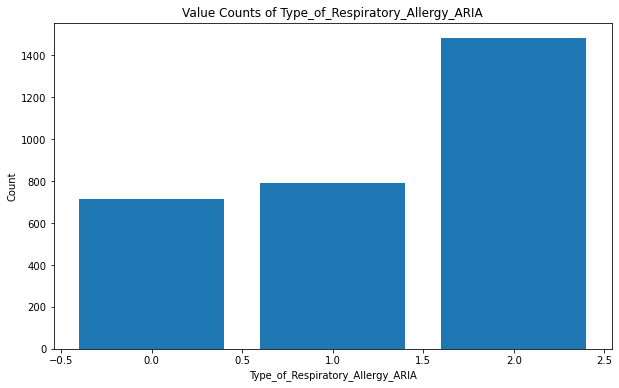

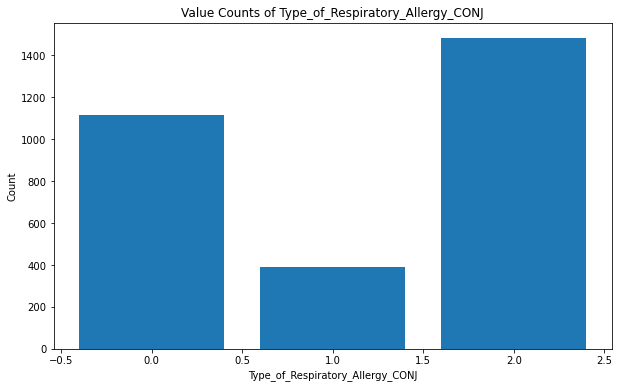

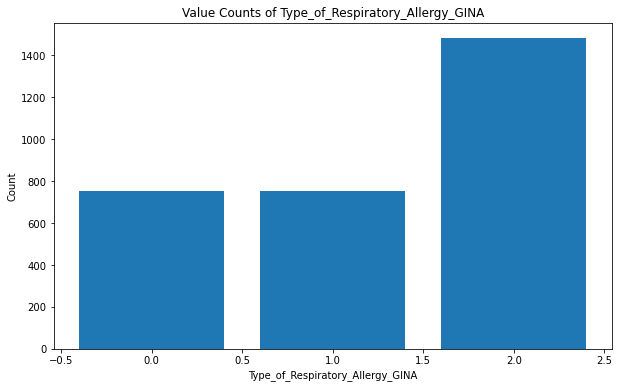

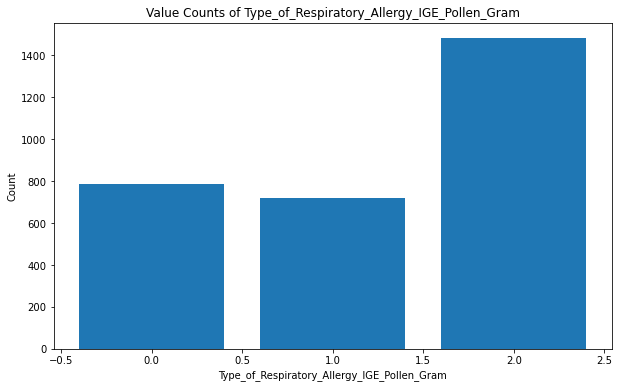

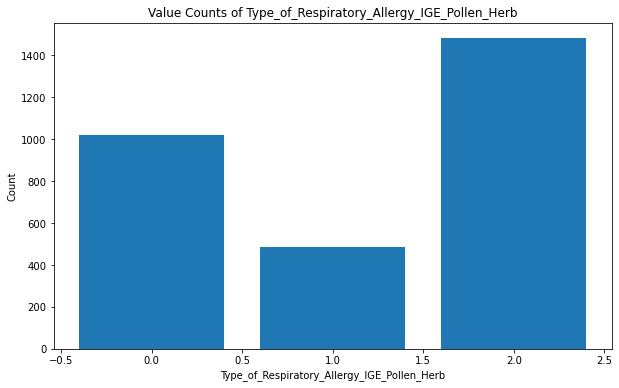

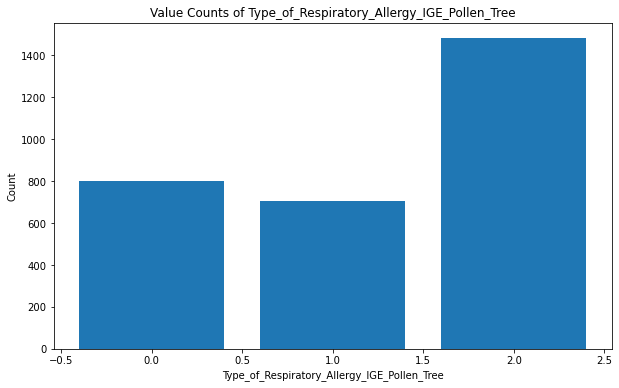

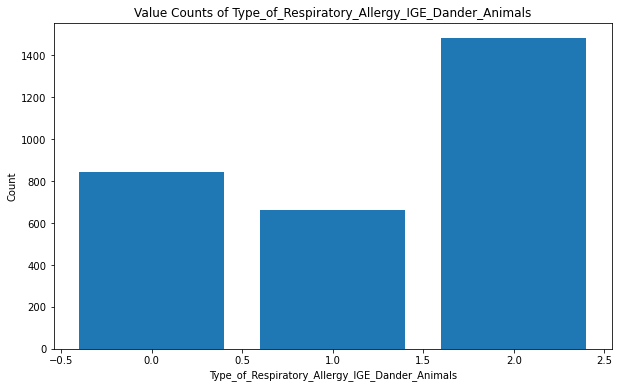

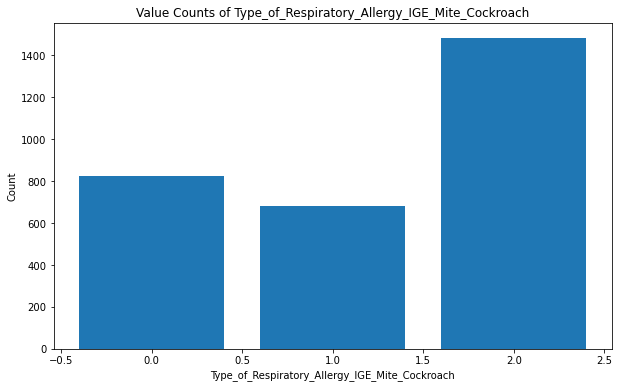

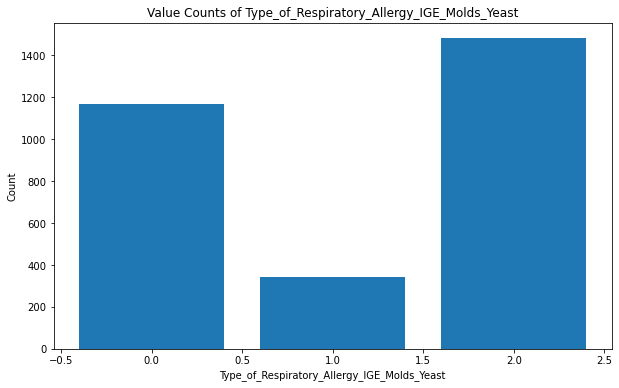

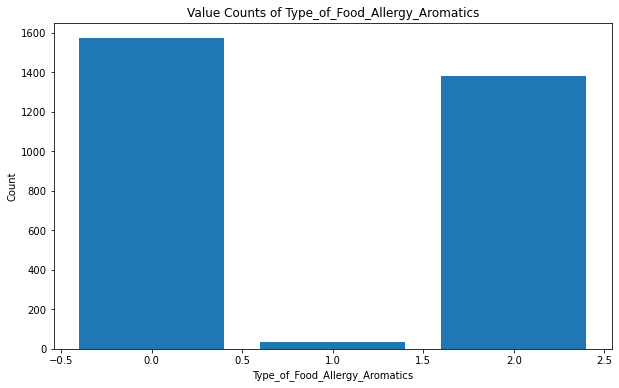

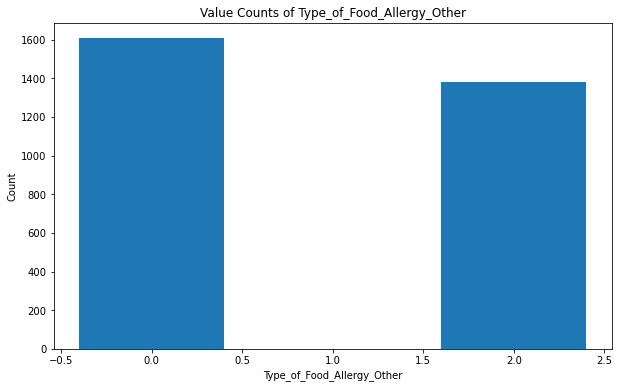

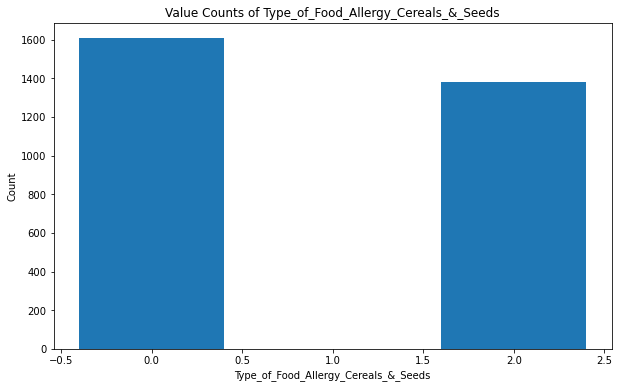

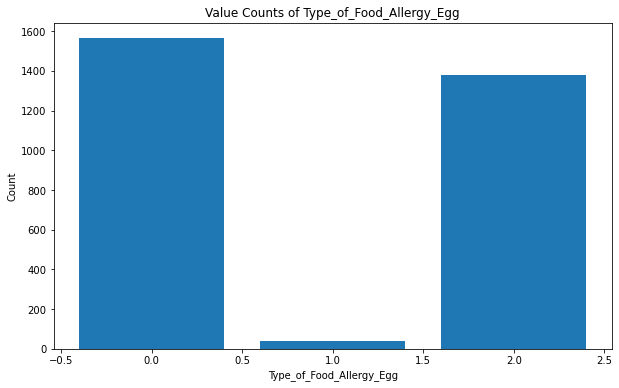

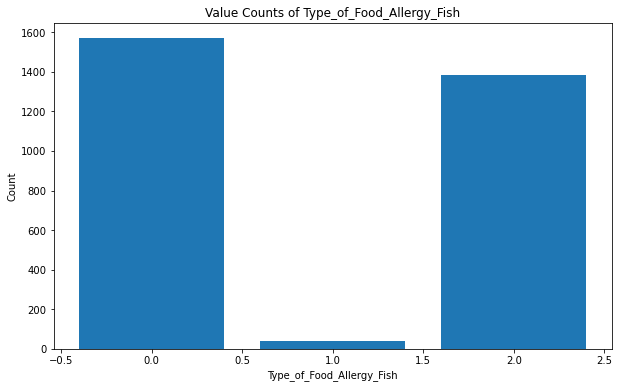

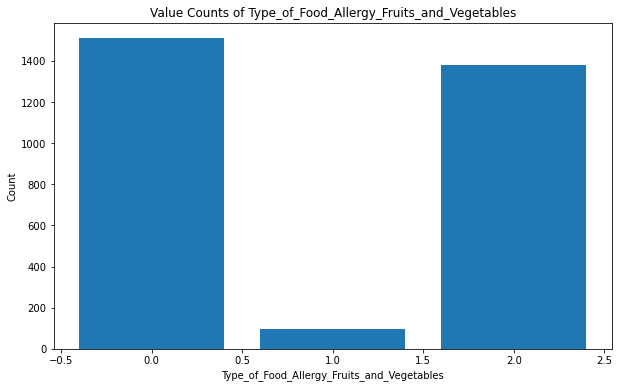

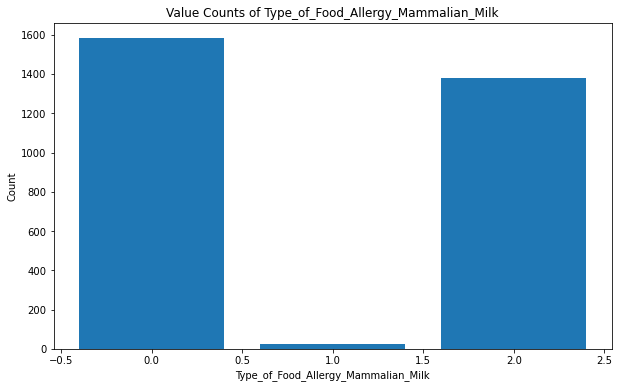

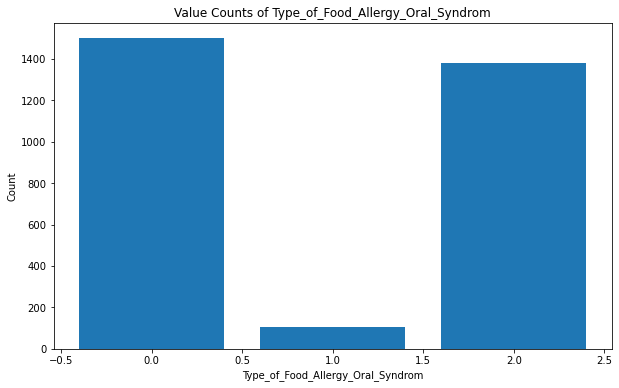

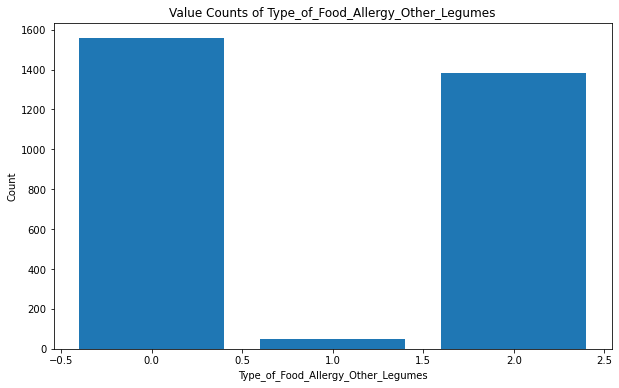

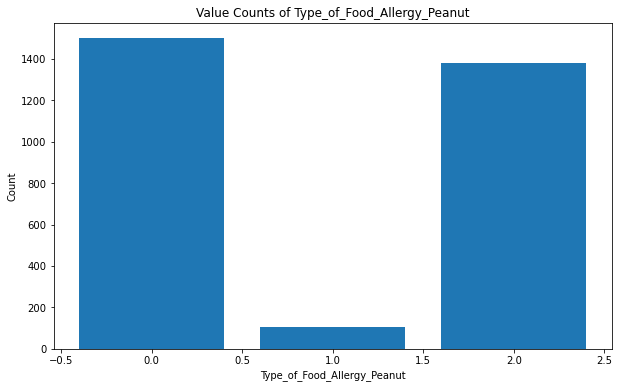

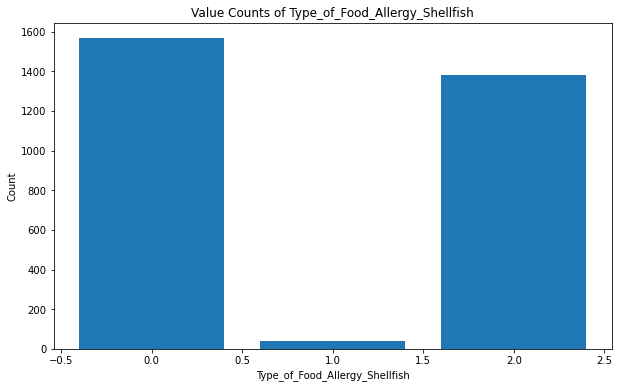

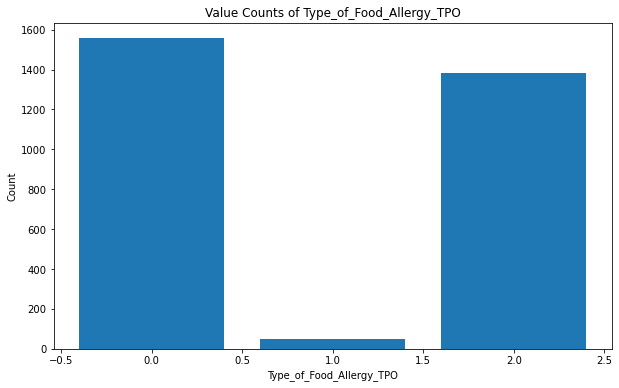

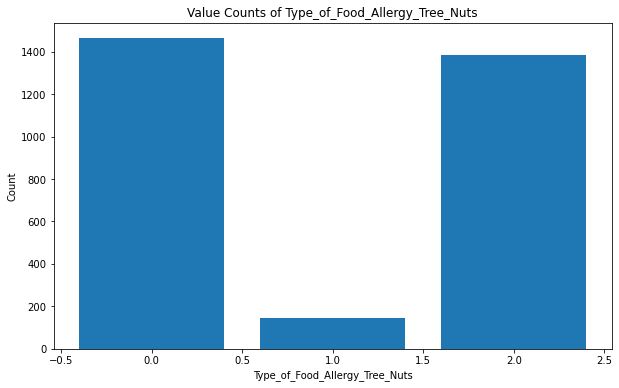

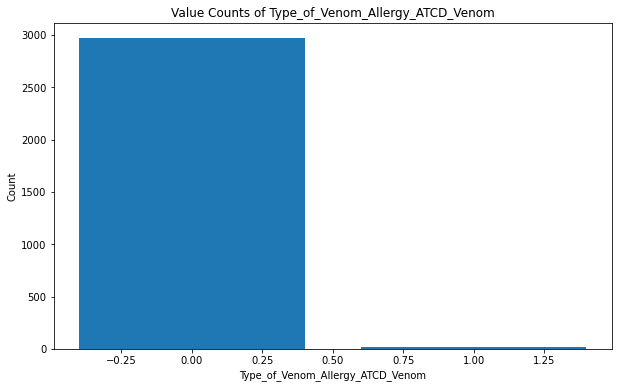

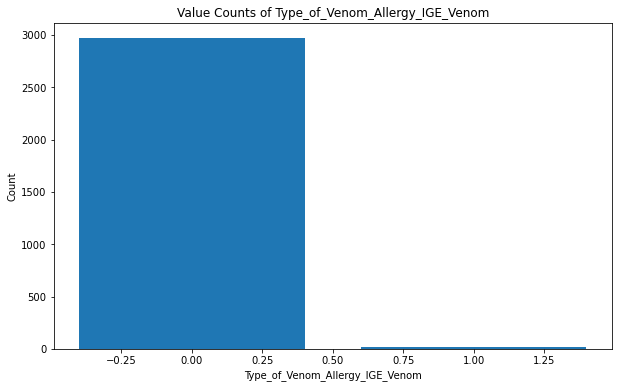

In [13]:
import matplotlib.pyplot as plt

# Iterate over each target column
for col in target_cols:
    # Get the value counts for the current column
    value_counts = df[col].value_counts()
    
    # Plot the bar graph
    plt.figure(figsize=(10, 6))
    plt.bar(value_counts.index, value_counts.values)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.title(f"Value Counts of {col}")
    plt.show()


In [14]:
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])


In [15]:
X = df.drop(target_cols, axis=1)  # Features (all columns except target_cols)
y = df[target_cols]  # Target (target_cols)

In [16]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
!pip install imbalanced-learn

  Using cached imbalanced_learn-0.10.1-py3-none-any.whl (226 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.9/301.9 KB 9.6 MB/s eta 0:00:00
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0


In [18]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from imblearn.over_sampling import SMOTE

In [19]:
# Define the models
models = {
    'Logistic Regression': LogisticRegression(solver='lbfgs', max_iter=500),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Support Vector Machines': SVC(),
    'k-Nearest Neighbors': KNeighborsClassifier(),
}

In [20]:
# result_df = pd.DataFrame(columns=[ 'Model', 'Precision', 'F1 Score', 'Recall', 'Accuracy'])
imbalanced_cols=['Venom_Allergy','Type_of_Food_Allergy_Aromatics', 'Type_of_Food_Allergy_Other', 'Type_of_Food_Allergy_Cereals_&_Seeds', 'Type_of_Food_Allergy_Egg', 'Type_of_Food_Allergy_Fish', 'Type_of_Food_Allergy_Fruits_and_Vegetables', 'Type_of_Food_Allergy_Mammalian_Milk', 'Type_of_Food_Allergy_Oral_Syndrom', 'Type_of_Food_Allergy_Other_Legumes', 'Type_of_Food_Allergy_Peanut', 'Type_of_Food_Allergy_Shellfish', 'Type_of_Food_Allergy_TPO', 'Type_of_Food_Allergy_Tree_Nuts', 'Type_of_Venom_Allergy_ATCD_Venom', 'Type_of_Venom_Allergy_IGE_Venom']
# Iterate over each target column
for col in target_cols:
    print(f"Results for {col}:")
    
    if col in imbalanced_cols:
        # Apply SMOTE sampling to the training data
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train[col])
    else:
        # Use the original training data for non-imbalanced columns
        X_train_resampled, y_train_resampled = X_train, y_train[col]
    result_df = pd.DataFrame(columns=['Model', 'Precision', 'F1 Score', 'Recall', 'Accuracy'])
    # Train and test the models for the current target column
    for model_name, model in models.items():
        # Train the model on the resampled training data
        model.fit(X_train_resampled, y_train_resampled)
        
        # Predict the target variable for the test set
        y_pred = model.predict(X_test)
        
        # Calculate the evaluation metrics
        precision = precision_score(y_test[col], y_pred, average='macro')
        recall = recall_score(y_test[col], y_pred, average='macro')
        f1 = f1_score(y_test[col], y_pred, average='macro')
        accuracy = accuracy_score(y_test[col], y_pred)
        
        # Append the results to the dataframe
        result_df = result_df.append({'Model': model_name, 'Precision': precision,
                                      'F1 Score': f1, 'Recall': recall, 'Accuracy': accuracy},
                                     ignore_index=True)
    
    # Print the dataframe for the current target column
    print(result_df)
    print()

Results for Allergy_Present:
                     Model Precision  F1 Score    Recall  Accuracy
0      Logistic Regression  0.698155  0.643566  0.633279   0.76087
1            Decision Tree  0.677918  0.680299  0.683422  0.747492
2            Random Forest  0.796458  0.710166  0.688902  0.811037
3        Gradient Boosting  0.823437  0.747247  0.722728  0.832776
4  Support Vector Machines  0.446248  0.469873  0.501744   0.66388
5      k-Nearest Neighbors  0.607661  0.602546  0.601578  0.714047

Results for Severe_Allergy:
                     Model Precision  F1 Score    Recall  Accuracy
0      Logistic Regression  0.696671  0.674126  0.668271  0.752508
1            Decision Tree  0.740609  0.736187  0.735213  0.787625
2            Random Forest  0.793643  0.750828  0.741008  0.822742
3        Gradient Boosting   0.82792  0.799376  0.785836  0.847826
4  Support Vector Machines  0.403226  0.421217   0.46608   0.59699
5      k-Nearest Neighbors  0.623439  0.618914  0.616978  0.690635

Res

In [21]:
gb_model=GradientBoostingClassifier()

In [22]:
test_data = pd.read_csv('data/test.csv')

for col in categorical_cols:
    le = LabelEncoder()
    test_data[col] = le.fit_transform(test_data[col])

# Fill missing values for object columns with mode
object_columns = test_data.select_dtypes(include=['object']).columns
for column in object_columns:
    mode_value = test_data[column].mode()[0]
    test_data[column] = test_data[column].fillna(mode_value)

# Fill missing values for numeric columns with median
numeric_columns = test_data.select_dtypes(include=['int', 'float']).columns
for column in numeric_columns:
    median_value = test_data[column].median()
    test_data[column] = test_data[column].fillna(median_value)
test_data.dtypes
X_train_resampled.shape

(4742, 336)

In [23]:
test_data.shape

(586, 337)

In [24]:
test_data['trustii_id']

0         1
1         4
2         5
3         7
4         8
       ... 
581    1276
582    1277
583    1280
584    1281
585    1282
Name: trustii_id, Length: 586, dtype: int64

In [25]:
test=test_data
test_data = test_data.drop('trustii_id', axis=1)
test_data.shape

(586, 336)

In [26]:
test_data.shape

(586, 336)

In [27]:
target_cols = ['Allergy_Present', 'Severe_Allergy', 'Respiratory_Allergy', 'Food_Allergy', 'Venom_Allergy', 'Type_of_Respiratory_Allergy_ARIA', 'Type_of_Respiratory_Allergy_CONJ', 'Type_of_Respiratory_Allergy_GINA', 'Type_of_Respiratory_Allergy_IGE_Pollen_Gram', 'Type_of_Respiratory_Allergy_IGE_Pollen_Herb', 'Type_of_Respiratory_Allergy_IGE_Pollen_Tree', 'Type_of_Respiratory_Allergy_IGE_Dander_Animals', 'Type_of_Respiratory_Allergy_IGE_Mite_Cockroach', 'Type_of_Respiratory_Allergy_IGE_Molds_Yeast', 'Type_of_Food_Allergy_Aromatics', 'Type_of_Food_Allergy_Other', 'Type_of_Food_Allergy_Cereals_&_Seeds', 'Type_of_Food_Allergy_Egg', 'Type_of_Food_Allergy_Fish', 'Type_of_Food_Allergy_Fruits_and_Vegetables', 'Type_of_Food_Allergy_Mammalian_Milk', 'Type_of_Food_Allergy_Oral_Syndrom', 'Type_of_Food_Allergy_Other_Legumes', 'Type_of_Food_Allergy_Peanut', 'Type_of_Food_Allergy_Shellfish', 'Type_of_Food_Allergy_TPO', 'Type_of_Food_Allergy_Tree_Nuts', 'Type_of_Venom_Allergy_ATCD_Venom', 'Type_of_Venom_Allergy_IGE_Venom']
predictions_df = pd.DataFrame()
for col in target_cols:
    print(f"Results for {col}:")
    
    if col in imbalanced_cols:
        # Apply SMOTE sampling to the training data
        smote = SMOTE()
        X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train[col])
    else:
        # Use the original training data for non-imbalanced columns
        X_train_resampled, y_train_resampled = X_train, y_train[col]
    gb_model.fit(X_train_resampled, y_train_resampled)   
    y_pred = gb_model.predict(test_data)
    predictions_df[col] = y_pred

Results for Allergy_Present:
Results for Severe_Allergy:
Results for Respiratory_Allergy:
Results for Food_Allergy:
Results for Venom_Allergy:
Results for Type_of_Respiratory_Allergy_ARIA:
Results for Type_of_Respiratory_Allergy_CONJ:
Results for Type_of_Respiratory_Allergy_GINA:
Results for Type_of_Respiratory_Allergy_IGE_Pollen_Gram:
Results for Type_of_Respiratory_Allergy_IGE_Pollen_Herb:
Results for Type_of_Respiratory_Allergy_IGE_Pollen_Tree:
Results for Type_of_Respiratory_Allergy_IGE_Dander_Animals:
Results for Type_of_Respiratory_Allergy_IGE_Mite_Cockroach:
Results for Type_of_Respiratory_Allergy_IGE_Molds_Yeast:
Results for Type_of_Food_Allergy_Aromatics:
Results for Type_of_Food_Allergy_Other:
Results for Type_of_Food_Allergy_Cereals_&_Seeds:
Results for Type_of_Food_Allergy_Egg:
Results for Type_of_Food_Allergy_Fish:
Results for Type_of_Food_Allergy_Fruits_and_Vegetables:
Results for Type_of_Food_Allergy_Mammalian_Milk:
Results for Type_of_Food_Allergy_Oral_Syndrom:
Results 

In [28]:
predictions_df.shape

(586, 29)

In [29]:
test['trustii_id']

0         1
1         4
2         5
3         7
4         8
       ... 
581    1276
582    1277
583    1280
584    1281
585    1282
Name: trustii_id, Length: 586, dtype: int64

In [30]:
predictions_df.insert(0, 'trustii_id', test['trustii_id'])
predictions_df

,trustii_id,Allergy_Present,Severe_Allergy,Respiratory_Allergy,Food_Allergy,Venom_Allergy,Type_of_Respiratory_Allergy_ARIA,Type_of_Respiratory_Allergy_CONJ,Type_of_Respiratory_Allergy_GINA,Type_of_Respiratory_Allergy_IGE_Pollen_Gram,...,Type_of_Food_Allergy_Fruits_and_Vegetables,Type_of_Food_Allergy_Mammalian_Milk,Type_of_Food_Allergy_Oral_Syndrom,Type_of_Food_Allergy_Other_Legumes,Type_of_Food_Allergy_Peanut,Type_of_Food_Allergy_Shellfish,Type_of_Food_Allergy_TPO,Type_of_Food_Allergy_Tree_Nuts,Type_of_Venom_Allergy_ATCD_Venom,Type_of_Venom_Allergy_IGE_Venom
0,1,1,0,1,0,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,4,1,0,1,0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
2,5,1,1,1,0,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
581,1276,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
582,1277,1,1,1,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
583,1280,1,1,1,0,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
584,1281,1,1,1,1,0,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [31]:

predictions_df.to_csv('predictions.csv', index=False)